In [ ]:
!quarto preview 240613.ipynb --host 210.117.173.184

# Contents 

- Introduction

- Related studies

- Data Description

- Proposed method

- Experimetn & Results

- Conclusion & Discussions


# Introduction

## Introduction

- Nowadays, transactions involving virtual currencies and credit cards are increasing.

- The use of credit cards provides convenience for consumers and facilitates the analysis of consumption patterns.

- However, it also leads to significant financial damage due to fraudulent transactions.

::: {.notes}

- 요즈음, 가상 화폐, 신용 카드 등의 거래가 많아짐

- 신용카드의 사용은 소비자의 거래의 편리성 제공, 소비 패턴 분석에 용이함

- 그러나 카드 사기 거래를 일으켜 큰 금융 피해를 야기
:::

## Introduction

Assumptions in Existing Studies for Identifying Credit Card Fraud Transactions:

- Large transactions made at specific merchants at specific times.

- Consideration of merchants and transaction amounts rather than individual customer's fraudulent transactions.

In summary, each transaction is analyzed independently to detect fraudulent activity.

::: {.notes}

신용 카드 사기 거래를 파악하기 위한 기존의 연구들의 가정

- 특정 시간에 특정 가맹점을 대상으로 큰 금액의 거래가 이루어지는 경우

- 고객 개인의 사기 거래보다는 상점, 거래 금액에 대한 고려 


즉, 각 거래를 독립적으로 보고 사기 거래를 분석
:::

## Introduction

- This study begins with the idea of what could be analyzed about fraudulent transactions if each transaction is not independent.

- Keeping in mind the dependencies of each transaction, the study aims to identify fraudulent transactions through their connections.


::: {.notes}

- 본 연구에서는 각 거래가 독립적이지 않다면 사기 거래를 어떻게 분석할 수 있을지 고민함.

- 거래의 종속성을 염두해 연결성을 통해 사기 거래를 파악.
:::

## Introduction

![Figure 1:T he graph displays the timeline of fraudulent transactions for credit card number 65691e+11, associated with Steven Johnson.](./figure/fraudulent_transactions.png){width=70%}

::: {.notes}

그림 1 은 시간 경과에 따른 사기 거래 발생 현황과 amt금액을 보여준
다. Steven 사기 거래 건수는 12건으로, 사기 거래가 시간별로 밀접하게
연관되어 있음을 알 수 있다. 또한 사기 거래인 경우 정상 거래보다 amt
의 금액이 큰 것을 확인할 수 있음. 고객의 거래 시간에 따라 사기 거
래가 상호 연관성을 보이는 이러한 시간적 의존성을 활용하여 종합적인
분석을 수행하는 것이 본 연구의 목표이다.
:::

## Introduction

- 기존의 이상치 탐지 기법들은 amt에 의존해 분석하는 방법들이
많음.

| Type   | Avg Amount              | Avg Amount (Legitimate) | Avg Amount (Fraudulent) |
|--------|-------------------------|-------------------------|-------------------------|
| A | 88                      | 88                      | 122                      |
| B | 179862                  | 178187                  | 1467967                 |
| C | 70.28                   | 67.63                   | 530.57           |


::: {.notes}

- 기존의 이상치 탐지 기법들은 amt에 의존해 분석하는 방법들이 많음. amt를 학습하고 사기거래를 분석하여 amt에 대한 의존도가 높음.

- 데이터 중 A의 데이터의 총 거래 금액 amt의 평균은 88이며 사기 거래일 때의 amt는 122, 정상 거래일 때 평균 금액은 88이다. 

- B의 amt 평균 금액은 179862이며 사기 거래일 때는1467967, 정상 거래일 때는 178187로 나타난다.

- C는 총 거래 금액 amt의 평균은 70.28이며 사기 거래일 때의 거래 금액의 평균은 530.57, 정상 거래일 때의 거래 금액의 평균은 67.63임. 

-  사기 거래일때의 amt의
분포를 통해 기존의 이상치 탐지 모델의 분석 결과를 유추해보면 평균
금액보다 많은 금액의 거래가 있을시 사기 거래로 분석할 것임
:::

## Introduction

![Figure 2: This graph represents transactions linked to credit card number 4.42608e+18. Blue nodes indicate fraudulent transactions, and red nodes
represent legitimate ones. Node size reflects the transaction amount, and edges connect nodes with closely timed transactions.](./figure/4.42608e+18.png)

::: {.notes}

- Kyle James의 거래 중 일부만을 뽑아 그래프로 그린
그림임. Kyle는 404개의 거래 중 11번의 사기 거래가 있음. 404개의 평
균 거래 금액은 62.64이고 정상 거래일 때 평균 거래 금액은 50.65, 사기
거래일 때 평균 금액은 491.07임. 위 그림에서 빨간색 노드는 정상 거래,
파란색 노드는 사기 거래임. 그림에서 노드의 크기는 amt의 크기를 나타냄. 엣지는 거래 시간이 가까운 노드끼리 서로 연결되어 있음. 노드 A
는 사기 거래이면서 거래 금액이 큰 거래임. 이와 같은 노드는 평균 거래
금액과 상이한 금액이므로 기존 이상치 탐지 기법으로도 사기 거래로 판
단할 확률이 높음. 그러나 amt금액이 현저히 작은 노드에 대해서는 사기
거래의 여부를 판단할 방법이 부족함. 본 연구에서 사용할 시간적 의존
성을 활용하면 노드 C를 정상 거래로 파악하고, 노드 B를 사기 거래로
파악할 수 있는 방법에 대한 답을 구할 수 있을 것으로 보임. 즉, 적은
거래 금액을 가지고 있어도 시간에 따라 사기 거래임을 파악하기 탁월

:::

# Related Studies

## Related Studies

Various machine learning techniques have been studied to handle highly imbalanced data, such as credit card fraud transactions.


- Wei et al[@wei2013effective]. proposed an online fraud detection system that demonstrated efficiency in handling large, imbalanced datasets.

- Wheeler (2000)[@wheeler2000multiple] used case-based reasoning to reduce final-stage fraud investigations in the credit approval process by developing adaptive solutions for fraud filtering and case prioritization.


::: {.notes}

신용카드 사기거래와 같은 불균형이 심한 데이터의 처리를 위해 다양한 머신러닝 기법이 연구됨.

- Weiet al. 은 온라인 사기 탐지 시스템을 제시하여 불균형한 대량 데이터에서 효율성을 입증함.

- Wheeler(2000)은 사례 기반 추론을 사용하여 신용 승인 과정에서 최종 단계 사기 조사의 수를 줄이기 위해 사기 필터링과 사례 우선순위 지정의 적응형 솔루션을 개발함.


:::

## Related Studies

- Srivastava (2008)[@srivastava2008credit] used Hidden Markov Models to train on normal cardholder behaviors and considered a transaction fraudulent if it was not accepted with high probability.

- Sanchez (2009)[@sanchez2009association] used association rules to identify normal behavior patterns and detect fraud in anomalous transactions.


::: {.notes}

- Srivastava(2008)은 숨겨진 마르코프 모델을 사용하여 정상적인 카드 소지자 행동을 학습하고, 높은 확률로 수용되지 않은 거래를 사기로 간주

- Sanchez(2009)은 연관 규칙을 사용하여 정상적인 행동 패턴을 식별하고 비정상 거래에서 사기를 탐지


:::

## Related Studies

- Research on fraud detection techniques based on graphs, such as GCN[@kipf2016semi], GAT[@velivckovic2017graph], and GraphSage[@hamilton2017representation]

- Dou and Liu (2018)[@dou2020enhancing] researched Levy-based similarity measurements using GNNs to counteract fraudsters' disguising behaviors and employed reinforcement learning to determine the optimal number of neighbors.


::: {.notes}

- 그래프를 기반으로 GCN, GAT, GraphSage와 같이 사기 탐지 기법으로 연구함

- Dou와 Liu(2018)은 사기범의 위장 행동을 방지하기 위해 GNN을 사용한 Levy 기반 유사성 측정 방법을 연구하고, 최적의 이웃 수를 결정하기 위해 강화 학습을 활용


:::

## Related Studies

::: {.panel-tabset}

#### Related Studies

- Van analyzed credit card fraud detection techniques using network-based expansions, utilizing bipartite and tripartite graphs.

#### bipartite graph

![Figure 3: An example of a bipartite graph](./figure/F2.png){width=70%}

#### tripartite graph

![Figure 4: An example of a tripartite graph](./figure/F3.png){width=70%}
:::

::: {.notes}


- Van은 네트워크 기반 확장을 이용한 신용카드 거래 사기 탐지 기법을 위해 이분형 그래프와 삼분형 그래프를 활용해 분석


:::

# Data description

## Data description


- Fraud transaction data can be obtained from financial exchange sites such as banks.

- Transaction data is anonymized to protect customer privacy.

- The analysis is conducted using data provided by Kaggle. 

::: {.notes}

- 사기거래 데이터은행 등의 금융거래소 사이트에서 얻을 수 있음.

- 거래 데이터는 고객의 개인정보 보호를 위해 가명처리 되어 있음. 

- 이에 캐글에서 제공하는 데이터를 통해 분석을 진행


:::

## Data description

To use the model proposed in this study, variables that can confirm the connectivity of observations are needed.

- The analysis is conducted using a dataset that contains the necessary variables.

::: {.notes}

본 연구에서 제안할 모델을 쓰기 위해서는 관측값들의 연결성을 확인 할 수 있는 변수가 필요함

- 필요 변수를 가지고 있는 데이터세트를 활용해 분석을 진행함

:::

## Data description

Credit card transaction records of European cardholders

- Data from 693 merchants and 943 individual cardholders

- Consists of 1,048,575 rows (transactions) and 22 columns (variables)

- 6,006 fraudulent transaction data, with a fraud transaction rate of 0.00573.

::: {.notes}

유럽 카드 소지자의 신용카드 거래 기록

- 693개의 상점, 943명의 개별 카드 소지자의 데이터

- 1,048,575개의 행(거래)와 22개의 열(variance)로 이루어짐

- 6006개의 사기 거래 데이터, 사기 거래 비율 0.00573

:::

## Data description

**Only a selective subset of the 22 variables, deemed most relevant to the analysis objectives, will be utilized.**

merchant information can be identified through the category

- Exclude the merchant variable and the distance to merchant variable

Exclude variables not reasonable for fraud transaction prediction

- Customer's distance variable

- Customer's name and date of birth

::: {.notes}

**22개의 변수 중 분석 목표와 가장 관련성이 높다고 판단되는 일부 기능만 선택적으로 활용**

category를 통한 상점 정보 파악 가능

- merchant 변수 제외, mechant의 위치 거리 변수 제외

사기 거래 예측에 합리적이지 않는 변수 제외

- 고객의 위치 거리 변수

- 고객의 이름, 생년월일

:::

## Data description
| Variable            | Description                                            |
|---------------------|--------------------------------------------------------|
| trans.date.and.time | Trading Hours                                          |
| amt                 | Transaction amount                                     |
| category            | Types of transaction stores                            |
| gender              | Gender of the customer                                 |
| job                 | Job of the customer                                    |
| is_fraud            | Indicate whether the transaction is fraudulent         |
|                     | (0: legitimate, 1: fraudulent)                         |


## Data description


::: {.panel-tabset}

#### Matrix

An example the data used in this study for fitting models to graphs.

$${\bf X}=\begin{pmatrix}
332.10\\ 
8.96\\ 
19.74\\ 
5.76\\ 
38.49\\ 
3.49\\ 
67.81\\ 
291.51\\ 
213.37\\ 
9.51\\ 
\end{pmatrix} , \quad {\bf y}=\begin{pmatrix}
1\\ 
1\\ 
0\\
0\\
0\\
0\\
0\\
0\\
0\\
0\\
\end{pmatrix},\quad {\bf W}=\begin{pmatrix}
0&	1&	0.81&	0.72&	0.88&	0.19&	0.39&	0.08&	0.12&	0.36	\\
1&	0&	0.81&	0.72&	0.88&	0.19&	0.39&	0.08&	0.12&	0.36	\\
0.81&	0.81&	0&	0.89&	0.93&	0.24&	0.49&	0.09&	0.14&	0.44	\\
0.72&	0.72&	0.89&	0&	0.82&	0.27&	0.55&	0.1&	0.16&	0.49	\\
0.88&	0.88&	0.93&	0.82&	0&	0.22&	0.45&	0.09&	0.13&	0.41	\\
0.19&	0.19&	0.24&	0.27&	0.22&	0&	0.49&	0.38&	0.59&	0.54	\\
0.39&	0.39&	0.49&	0.55&	0.45&	0.49&	0&	0.19&	0.29&	0.91	\\
0.08&	0.08&	0.09&	0.1&	0.09&	0.38&	0.19&	0&	0.64&	0.21	\\
0.12&	0.12&	0.14&	0.16&	0.13&	0.59&	0.29&	0.64&	0&	0.32	\\
0.36&	0.36&	0.44&	0.49&	0.41&	0.54&	0.91&	0.21&	0.32&	0 \\
\end{pmatrix}$$

#### Graph1

![Figure 5: The graph representation corresponds to the credit card number 4.503100e+18, associated with the customer named Katherine Tucker.](./figure/F4_3.png){width=70%}

#### Graph2

![Figure 6: The graph representation corresponds to the credit card number 4.503100e+18, associated with the customer named Katherine Tucker.](./figure/graph45031.png){width=70%}


:::


::: {.notes}


위 그림은 데이터의 X, y, W를 이용해 그래프화한 그림임. 노드의
크기는 amt값의 크기를 나타냄. 노드의 색은 사기거래 여부를 나타내
며 파란색이면 사기거래, 빨간색이면 정상거래임. 그래프에서 노란색의
노드를 노드의 크기만을 보고 사기 거래 여부를 판단하기는 어려울 수
있음. 이 때 시간의 연결성을 반영한 weight metrix를 통해 사기거래의
여부를 판단 할 수 있을 것임. 노란색 노드와 연결성이 높은(엣지가 굵은)
왼쪽의 노드가 사기거래이므로 사기거래일 확률이 높을 것임.

본 연구에서는 엣지의 연결성을 고려하여 시간의 차이 값이 적은 엣
지는 연결을 제거해 위와 같은 그래프 형식으로 나타내고 활용하려 함.

:::

# Proposed method

## General Methodology

**Algorithm 1** Graph Convolutional Network with Euclidean Model

**Require**: Design matrix ${\bf X} \in \mathbb{R}^{n \times p}$, label vector ${\bf y} \in \mathbb{R}^n$, set of indices ${\cal J}$ for variables defining relations among observations

1. **for each** $j \in {\cal J}$ **do**
2. &nbsp;&nbsp;&nbsp;&nbsp; Construct ${\bf W}_j \in \mathbb{R}^{n \times n}$
3. &nbsp;&nbsp;&nbsp;&nbsp; Define the ${\bf A}_j$ and ${\bf D}_j$ for each ${\bf W}_j$
4. &nbsp;&nbsp;&nbsp;&nbsp; Initialize ${\bf H}_j^{(0)} = {\bf X}^{(-j)}$
5. &nbsp;&nbsp;&nbsp;&nbsp; **for** $l = 0$ to $L_j$ **do**
6. &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; ${\bf H}_j^{(l+1)} \gets \sigma \left( {\bf D}_j^{-1/2} {\bf A}_j {\bf D}_j^{-1/2} {\bf H}_j^{(l)} {\bf \Theta}_j^{(l)} \right)$
7. &nbsp;&nbsp;&nbsp;&nbsp; **end for**
8. &nbsp;&nbsp;&nbsp;&nbsp; Update $\{{\bf \Theta}_j^{(l)}: l = 1,2,\dots,L_j-1\}$ from ${\cal L}_j = {\cal L}^0_j + \lambda {\cal L}^{\text{reg}}_j$
9. **end for**
10. Feature concatenation: $\tilde{\bf X} \gets {\bf X} \oplus {\bf H}_1^{(L_1)} \oplus {\bf H}_2^{(L_2)} \oplus \dots \oplus {\bf H}_{|{\cal J}|}^{(|{\cal J}|)}$
11. Train a predictive model $M_{\text{Euclid}}$ using $(\tilde{\bf X},{\bf y})$.

## General Methodology

::: {.panel-tabset}

#### 1

- ${\bf X}$: matrix with $(n \times p)$, ${\bf y}$: vector of length n

- $\mathbf{y}$ contains labels indicating fraud presence, while $\mathbf{X}$ represents the design matrix for predicting $\mathbf{y}$. 

#### 2

- Some columns of ${\bf X}$ define relationships between observations

- Denote these variables as $\{{\bf x}_j : j \in {\cal J}\}$. 

- ${\cal J}\$ is the index set for variables defining relationships

#### 3

- ${\bf W}_j$: Relationship matrix between observations from ${\bf x}_j$

- ${\bf W}_j$:  matrix with $(n \times n)$

- **Goal**: Predict ${\bf y}$ using both ${\bf X}$ and $\{{\bf W}_j, j \in {\cal J}\} $

#### 4

- ${\bf W}_j$ dimension grows with ${\bf 𝑛}$, so reduce ${\bf W}_j$ appropriately

- Use hidden layer ${\bf H}_j^{(L_j)}$ from the graph convolution unit

#### 5

Graph convolution

- Equation: $$
{\bf H}_j^{(l+1)} = \sigma\big({\bf D}_j^{-1/2}{\bf A}_j{\bf D}_j^{-1/2}{\bf H}_j^{(l)} {\bf \Theta}_j^{(l)}) \big) \quad \text{for $l=0,1,2,\dots,L_j$}
$$

- ${\bf A}_j$: Adjacency matrix of ${\bf W}_j$

- ${\bf D}_j$: Degree matrix of ${\bf W}_j$

- ${\bf \Theta}_j^{(l)}$: Learnable parameters

- $\sigma$: Activation function

#### 6

Utilize GCN to handle the connectivity of observations in credit card fraud detection.

Optimize using a loss function similar to {@kipf2016semi}.

- Loss function: $${\cal L}_j = {\cal L}^0_j +\lambda {\cal L}^{\text{reg}}_j\quad {\cal L}^{\text{reg}}_j={\bf o}_j^\top({\bf D}_j-{\bf A}_j) {\bf o}_j$$

- ${\bf o}_j$: Output from linearly transforming ${\bf H}_j^{(L_j)}$

- ${\cal L}^0_j$: Supervised loss related to ${\bf y}$

- ${\cal L}^{\text{reg}}_j$: Encourages similarity as relationships increase.

#### 7 

- ${\bf H}_j^{(l)}$: Input for layer $l$.

- ${\bf H}_j^{(0)} = {\bf X}^{(-j)}$:  Initial layer excluding ${\bf x}_j$

- Use standard linear transform instead of graph convolution for final layer.

- This embeds the connection information of observations in the penultimate hidden layer.

#### 8 

- Concatenated features: $$\tilde{\bf X}= {\bf X} \oplus {\bf H}_1^{(L_1)} \oplus {\bf H}_2^{(L_2)} \oplus \dots \oplus {\bf H}_{|{\cal J}|}^{(|{\cal J}|)}$$

- Train Euclidean model $M_{\text{Euclid}}$ using $\tilde{\bf X}$

:::

## Application to Fraud Data

- Analyzing ${\tt fraud\_data}$ using the proposed methodology.

- Given data: $({\bf X},{\bf y})$

- Only, ${\tt trans\_data\_and\_time}$ captures the graph structure ($|{\cal J}|=1$), referred to as ${\bf x}_{\tt tdt}$

- ${\bf H}^{(0)}$ consists of ${\bf x}_{\tt amt}$ since ${\tt amt}$ is crucial for predicting fraud.

## Application to Fraud Data

- Consider ${\tt cc\_num}$ to create ${\bf x}_{\tt tdt}$

- Block-matrix structure: $${\bf W}_{\tt tdt}=\begin{bmatrix}
{\bf W}_{{\tt tdt},1} & {\bf 0} & {\bf 0} & \dots & {\bf 0} \\ 
{\bf 0} & {\bf W}_{{\tt tdt},2} & {\bf 0} & \dots & {\bf 0} \\ 
{\bf 0} & {\bf 0} & {\bf W}_{{\tt tdt},3} & \dots & {\bf 0} \\ 
\dots & \dots & \dots & \dots & \dots \\ 
{\bf 0} & {\bf 0} & {\bf 0} & \dots & {\bf W}_{{\tt tdt},|{\cal I}|}
\end{bmatrix}$$

- ${\cal I}$ is the set of ${\tt cc\_num}$

## Application to Fraud Data

- For fixed $i \in {\cal I}, (t,s)$-th elements of ${\bf W}_{{\tt tdt},i}$: $$\exp \left(\frac{-|t-s|_2^2}{\theta} \right) \ \ \ \text{where}  \ \  \ t,s \in {\cal T}_i$$

- ${\cal T}_i$ is the set of transaction times for the $i$th customer.

## Application to Fraud Data

**Graph Convolutional Network Architecture**

1. **1×16 GCN Layer**: 
   $${\bf H}^{(1)} = \text{ReLU}\left({\bf D}^{-1/2} {\bf A} {\bf D}^{-1/2} {\bf H}^{(0)} {\bf \Theta}^{(0)}\right)$$

2. **16×8 GCN Layer**: 
   $${\bf H}^{(2)} = \text{ReLU}\left({\bf D}^{-1/2} {\bf A} {\bf D}^{-1/2} {\bf H}^{(1)} {\bf \Theta}^{(1)}\right)$$

3. **8×1 Linear Layer**: 
   $$\text{Sigmoid}\left({\bf H}^{(2)} {\bf \Theta}^{(2)}\right)$$

## Application to Fraud Data

- ${\bf D}$ and ${\bf A}$: Degree matrix and adjacency matrix for ${\bf W}$.

- ${\bf \Theta}^{(0)}$, ${\bf \Theta}^{(1)}$,${\bf \Theta}^{(2)}$ dimensions:  $(1,16), (16,8), (8,1)$.

- Linear Layer used for dimension reduction, capturing non-Euclidean information.

## Application to Fraud Data

- **Experiment 5.1**: Predict ${\bf y}$ using ${\bf H}^{(2)}$

- **Experiment 5.2**: Predict ${\bf y}$ using  ${\bf X} \oplus {\bf H}^{(2)}$

# Experiment & Results

## Experiment

To analyze and compare the experimental results, the following models were utilized:

- **Proximity-Based Models**: KNN[@ramaswamy2000efficient], ROD[@almardeny2020novel]

- **Linear Model-Base**: PCA[@shyu2003novel]

- **Ensemble Methods**: RandomForest[@liaw2002classification], Isolation Forest[@liu2008isolation], XGBoost[@chen2016xgboost], LightGBM[@ke2017lightgbm], CatBoost[@prokhorenkova2018catboost]

- **Neural Network Methods**

## Experiment

![Figure 7: The architecture proposed in this study showcases a hybrid approach that combines non-Euclidean and Euclidean data processing. The non-Euclidean component includes a graph-based structure where nodes pass through multiple convolution layers and are processed with ReLU activation functions and sigmoid outputs. The hidden layers, which contain the connectivity information of observations, are utilized as new features. By adding graph information to the explanatory variables of the Euclidean model, the data is input into various machine learning models such as neural networks, random forests, LightGBM, CatBoost, etc., allowing for comprehensive analysis through various algorithmic approaches.](./figure/arcccc.png)

## Experiment 1

**Data Analysis Using Graph-Based Models**

- Model: **CO-GCN** (considers connectivity of ${\tt trans\_and\_date\_time}$).

- Added embedding values using graph information to amt variable.

## Experiment 1

| Method       | Accuracy | Precision | Recall  | F1-score | AUC    |
|--------------|----------|-----------|---------|----------|--------|
| **CO-GCN**       | 0.994669 | 0.594801  | 0.215991| 0.316904 | 0.985420|
| NeuralNet    | 0.998351 | 0.921711  | 0.777902| 0.843722 | 0.997630|
| RandomForest | 0.997302 | 0.823810  | 0.672405| 0.740447 | 0.980178|
| ExtraTrees   | 0.997718 | 0.914009  | 0.675181| 0.772064 | 0.981392|
| LightGBM     | 0.996499 | 0.824149  | 0.576481| 0.680019 | 0.991976|
| CatBoost     | 0.997111 | 0.843077  | 0.608551| 0.706869 | 0.974223|
| XGBoost      | 0.996748 | 0.812098  | 0.564132| 0.661540 | 0.945512|
| KNeighbors   | 0.994015 | 0.404206  | 0.096058| 0.155227 | 0.631168|


## Experiment 1

- CO-GCN achieved an AUC of 0.985, indicating superior or similar performance compared to Euclidean models with explanatory variables ${\tt amt, trans\_date\_and\_time, category, gender, job}$.

- Confirms GCN model's effectiveness by considering temporal connectivity.

## Experiment 2

**Enhancing the Performance of Euclidean Models Using Non-Euclidean Graph Information**

- Enhance performance of Euclidean models using non-Euclidean graph information.

- Analyze independent customer transactions using graph information.

- Use a weight matrix based on transaction times for each customer.

- Probabilities learned from GCN are used as new features in ${\bf X}$


## Experiment 2 example

| Method           | Accuracy | Precision | Recall  | F1-score | AUC    |
|------------------|----------|-----------|---------|----------|--------|
| NeuralNet        | 0.998351 | 0.921711  | 0.777902| 0.843722 | 0.997630|
| **NeuralNet\_G**     | 0.998334 | 0.924764  | 0.866741| 0.894818 | 0.999656|
| RandomForest     | 0.997302 | 0.823810  | 0.672405| 0.740447 | 0.980178|
| **RandomForest\_G**  | 0.996649 | 0.942949  | 0.816769| 0.875335 | 0.999124|
| ExtraTrees       | 0.997718 | 0.914009  | 0.675181| 0.772064 | 0.981392|
| **ExtraTrees\_G**    | 0.998379 | 0.951084  | 0.755692| 0.842203 | 0.997328|
| LightGBM         | 0.996499 | 0.824149  | 0.576481| 0.680019 | 0.991976|
| **LightGBM\_G**      | 0.998862 | 0.914418  | 0.889354| 0.901088 | 0.999706|
| CatBoost         | 0.997111 | 0.843077  | 0.608551| 0.706869 | 0.974223|
| **CatBoost\_G**     | 0.999071 | 0.920835  | 0.742921| 0.815109 | 0.994701|
| XGBoost          | 0.996748 | 0.812098  | 0.564132| 0.661540 | 0.945512|
| **XGBoost\_G**      | 0.998656 | 0.914561  | 0.830796| 0.877852 | 0.999132|
| KNeighbors       | 0.994015 | 0.404206  | 0.096058| 0.155227 | 0.631168|
| **KNeighbors\_G**    | 0.994558 | 0.690987  | 0.083935| 0.158309 | 0.634899|




## Experiment 2

- No significant difference in AUC values between existing methods and those including graph information probabilities.

- Models were already well-trained with explanatory variables.

- Significant difference in probability values for small transaction amounts.

## Experiment 2

![Comparison of y prediction probabilities using two different modeling approaches. The blue line represents the model predictions using explanatory variables X, while the orange line incorporates additional graph information values into the X variables. Both figures display the probability of y=1. The left figure shows the prediction probabilities for all amounts, whereas the right figure is specific to cases where amt less than 80.](./figure/tr1_2bin_.png)


::: {.notes}


사기 거래 데이터는 불균형이 심한 데이터임. 거래 데이터 중 몇 개만
잘못 판단하여도 해당 분석 결과 값은 크게 달라질 수 있음. Figure 6에서
파란색 선은 그래프 정보를 추가하지 않고 설명변수 x만을 사용하여 모
델을 학습해 분석한 결과값임. 주황색은 설명변수 X에 그래프 정보값을
추가하고 모델을 학습해 분석한 결과값임 사기거래일 때 예측 확률값을
살펴보자. Figure 6의 왼쪽 그림은 전체 amt로 살펴본 그림임. 기존 연구
방법에서는 사기거래인데 정상 거래로 예측한 값이 약 200개의 수치를
나타냄. 그래프 정보를 추가하여 모델을 학습했을 때는 사기거래인데
정상 거래로 예측확률 값이 100개 미만으로 나타남. 또한 사기거래를
올바르게 예측한 확률값이 약 400개에서 1,000개 이상으로 나타남.

이는 amt가 적은 금액일수록 극명한 차이를 확인할 수 있음. 데이터
의 amt 평균 금액이 70.28이므로 amt가 80미만일 때의 모델의 y 예측
확률값의 분포를 확인하였음. Figure 6을 통해 확인 할 수 있음.

amt가 80미만일 때, 기존 연구 방법에서는 사기거래인데 정상거래로
예측한 확률값이 사기거래로 예측한 확률값보다 많음. 정상 거래로 판단한 값이 약 120개에 해당함. 그래프 정보를 추가했을 때는 약 30개로
약 25% 감소함을 확인할 수 있음. 이는 amt가 적은 금액일 때 그래프
정보를 추가하면 시간의 연결성을 고려해 사기 거래를 파악할 수 있는
성능이 향상되었음을 의미함



:::

## Experiment 2 - example

::: {.panel-tabset}

#### Data

Michael Rodriguez의 사기 거래 데이터

| trans_date_trans_time | amt    | is_fraud | predict | predict_G | proba   | proba_G |
|-----------------------|--------|----------|---------|-----------|---------|---------|
| 2019-10-12 05:12:00   | 291.43 | 1        | 1       | 1         | 0.919460| 0.987208|
| 2019-10-12 22:12:00   | 905.52 | 1        | 1       | 1         | 0.879090| 0.979814|
| 2019-10-13 05:04:00   | 20.02  | 1        | 0       | 1         | 0.402154| 0.963092|
| 2019-10-13 22:16:00   | 736.16 | 1        | 1       | 1         | 0.778249| 0.981730|

#### Graph

![The graph representation corresponds to the credit card number 3.024890e+13, associated with Michael Rodriguez.](./figure/302489.png)



::: {.notes}


Michael Rodriguez의 거래 평균 금액은 56.25임. 정상 거래일때의
평균은 49.19이며, 사기 거래일때의 amt 금액 평균은 488.28임. 기존 연
구들은 amt금액이 큰 경우 모두 사기 거래로 예측하였고, amt가 작은
금액인 20.02일 때는 정상 거래로 예측함. amt가 20.02일때 확률 예측
값은 0.4로 낮은 값을 보임. 반면에 그래프 정보를 활용한 방법은 amt
가 적은 금액일지라도 사기 거래로 옳게 예측하였으며 0.96의 높은 확률
값으로 예측함. 또한 amt가 높은 금액에서도 기존 연구들의 확률값보다
높은 확률값을 보임을 알 수 있음

이는 그래프를 시각화 한 Figure 7을 살펴보면 좀 더 쉽게 이해할
수 있음. Michael 거래 중 사기 거래와 밀접한 데이터 9개를 선별하여
시각화 한 그림임. 그래프에서 엣지의 웨이트를 고려해 링크의 연결을
제거한 후의 그림임. 이는 사기 거래 금액이 적어도 사기 거래 여부를
충분히 판단할 수 있는 방법임

:::

## Additinal Experiments

- To analyze the impact of varying the shape of train data while maintaining the test data shape

- Original data fraud transaction ratio of 0.00573 is maintained.

- Data split into train and test sets in a 7:3 ratio.

- Test data shape remains constant.

- Train data shape is varied for analysis.

## Additinal Experiments

| Category | shape       | Fraud Transaction Ratio |
|----------|-------------|-------------------------|
| train1   | (734003, 22)| 0.00573                 |
| train2   | (84100, 22) | 0.05                    |
| train3   | (42050, 22) | 0.1                     |
| train4   | (21025, 22) | 0.2                     |
| train5   | (14017, 22) | 0.3                     |
| train6   | (10512, 22) | 0.4                     |
| train7   | (8410, 22)  | 0.5                     |
| test     | (314572, 22)| 0.00573                 |


## Additinal Experiments

::: {.panel-tabset}

#### Experiments

To compare fraud probability for transactions with amounts (amt) less than 80 using undersampled train data.

#### train2

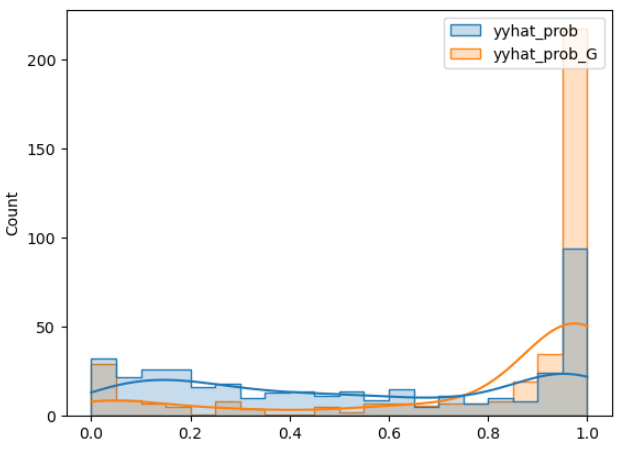

#### train3

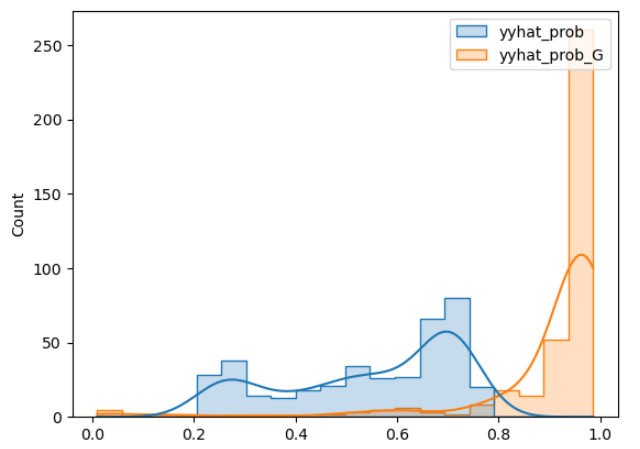

#### train4

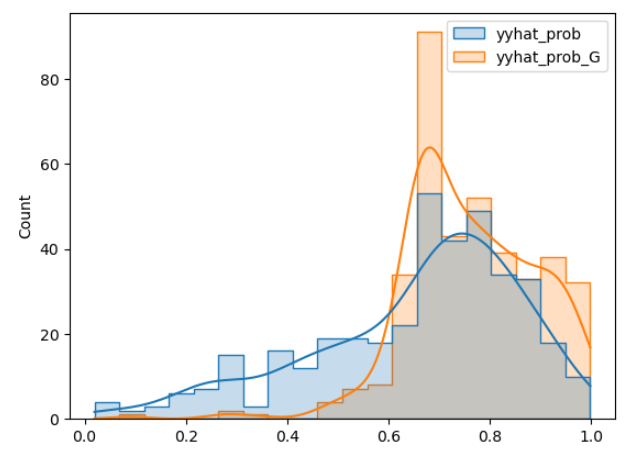

#### train5

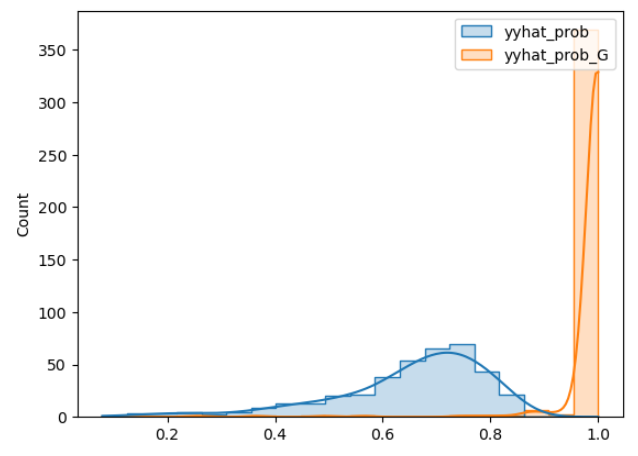

#### train6

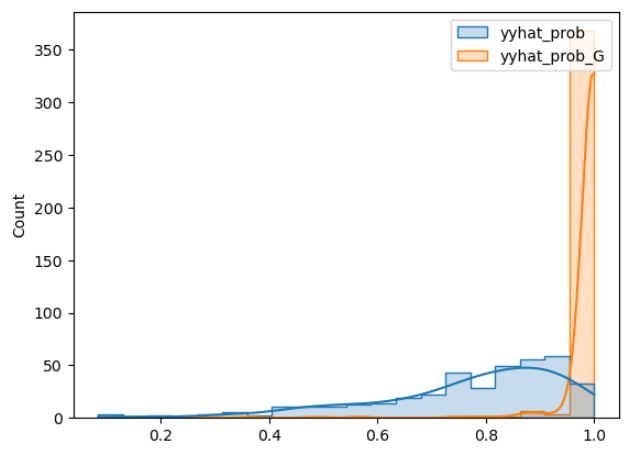

#### train7

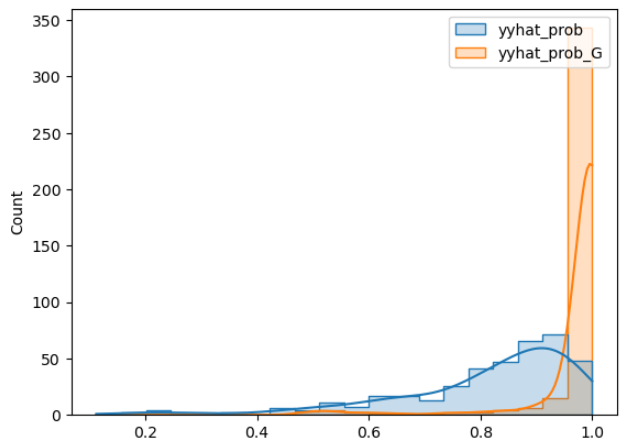

:::

## Additinal Experiments

- Adding graph information to explanatory variables demonstrates superior performance.

- This approach shows significant effectiveness even when applied to traditional undersampling methods for analyzing imbalanced data.


::: {.notes}

그래프 정보 값을 설명변수에 추가한 방법이 더 우수한
성능을 보이는 것을 확인할 수 있음. 이는 불균형 데이터에서 분석의
효율성을 위하여 언더샘플링한 후 분석하는 기존의 연구 방법들에 적용 해도 큰 효과를 보이는 것을 확인할 수 있음. 

:::

## Additinal Experiments

- In Dataset train4, the model showed poor learning, likely due to information loss during the random undersampling of train data.

- Despite this, the proposed method in this study exhibited superior performance.


::: {.notes}

D(train4)에서는 학습이 잘
안된 것으로 보이는데, train data를 랜덤으로 언더샘플링 하는 과정에서
학습 데이터의 정보 손실이 일어났기 떄문임. 

그럼에도 본 연구에서 제
안한 방법이 우수한 성능을 보임.

:::

## Additinal Experiments using Pyod

- To compare and analyze Pyod outlier detection techniques with and without GCN information.

- Pyod requires numerical input, so the column used is solely ${\tt amt}$.

- Experimental data is based on **train1** data.


::: {.notes}


이상치 탐지 기법으로 알려진 pyod기법들에 gcn의 정보를
활용한것과비교분석해봄. pyod는입력값을수치로만받으므로기본연
구의 컬럼은 amt로만 설정하였음. 실험데이터는 train1 data로 진행함

:::

## Additinal Experiments using Pyod

- To compare and analyze Pyod outlier detection techniques with and without GCN information.

- Pyod requires numerical input, so the column used is solely ${\tt amt}$.

- Experimental data is based on **train1** data.


::: {.notes}


이상치 탐지 기법으로 알려진 pyod기법들에 gcn의 정보를
활용한것과비교분석해봄. pyod는입력값을수치로만받으므로기본연
구의 컬럼은 amt로만 설정하였음. 실험데이터는 train1 data로 진행함

:::

## Additinal Experiments using Pyod

| Method  | Accuracy | Precision | Recall   | F1-score | AUC    |
|---------|----------|-----------|----------|----------|--------|
| IForest | 0.992832 | 0.373889  | 0.373682 | 0.373786 | 0.683660 |
| IForest_G | 0.994313 | 0.503290  | 0.509717 | 0.506483 | 0.753410 |
| KNN     | 0.992149 | 0.309185  | 0.300944 | 0.305009 | 0.648537 |
| KNN_G   | 0.994129 | 0.487251  | 0.488063 | 0.487657 | 0.742553 |
| PCA     | 0.992835 | 0.374931  | 0.377013 | 0.375969 | 0.686697 |
| PCA_G   | 0.993401 | 0.425475  | 0.435869 | 0.430609 | 0.716240 |
| ROD     | 0.982551 | 0.000542  | 0.001111 | 0.000729 | 0.494657 |
| ROD_G   | 0.99411  | 0.486007  | 0.501389 | 0.493578 | 0.749168 |


## Additinal Experiments using Pyod

- Pyod techniques showed lower performance compared to the latest boosting models.

- In Experiment 2, multiple explanatory variables were used, while in this experiment, only amt was used due to Pyod's requirement for numerical inputs.

- Latest boosting models achieved better performance through hyperparameter tuning.

- Despite this, incorporating graph information into Pyod models resulted in a general increase in AUC values.

# Conclusion and Discussion

## Conclusion

- Graph information was stacked onto non-graph-based research methods to assess performance.

- Demonstrated the ability to detect fraud in small transaction amounts, moving beyond reliance on transaction amount alone.

- Each customer was analyzed as an individual graph structure using GCN models.

- Utilized temporal data to enhance intuitive transaction understanding in graph-based research methods.

- Non-Euclidean models (XGBoost, LightGBM, CatBoost, etc.) incorporating graph information showed strong performance even for small transaction amounts.

## Discussion

- The use of a weight matrix based on ${\tt trans\_date\_and\_time}$ and learning through ${\tt amt}$ in the graph model helps identify individual transactions for each customer. The results show that this graph model is competitive with existing fraud detection models.

- Using time data in graphs allows for identifying fraud patterns beyond dependency on transaction amounts, making it easier to detect fraud in lower transaction amounts. For example, if transactions at 11:00 and 11:30 are fraudulent, a transaction at 11:15 is likely also fraudulent, regardless of the amount.

## Discussion

- Graph-based probability values were incorporated into the Euclidean model's explanatory variables for training, resulting in superior performance compared to existing methods. This approach reduced dependency on transaction amounts and improved performance with lower transaction amounts.

- The methods proposed in this study could potentially be applied using dependent data observations like traffic data or Wikipedia citations, in addition to fraud transaction data.

# Reference